In [92]:
import requests
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [93]:
cidade = 'Campina Grande'
dia = 10
mes = 11
ano = 2021
hoje = dt.datetime.today().timestamp()
data = dt.datetime(ano, mes, dia).timestamp()

resposta_cidade = requests.get(f'http://api.openweathermap.org/geo/1.0/direct?q={cidade}&appid=51f1f5550cf467bd43498d3a39116d03').json()

In [94]:
lat = resposta_cidade[0]['lat']
lon = resposta_cidade[0]['lon']

historico_qual_ar = requests.get(f'http://api.openweathermap.org/data/2.5/air_pollution/history?lat={lat}&lon={lon}&start={data:.0f}&end={hoje:.0f}&appid=51f1f5550cf467bd43498d3a39116d03').json()


In [95]:
df = pd.json_normalize(historico_qual_ar['list'])
df.drop('main.aqi', inplace=True, axis=1)
df.head()

,dt,components.co,components.no,components.no2,components.o3,components.so2,components.pm2_5,components.pm10,components.nh3
0,1636513200,260.35,0.0,3.38,28.97,0.75,5.03,10.83,0.66
1,1636516800,260.35,0.0,2.91,28.61,0.75,5.15,11.39,0.68
2,1636520400,260.35,0.0,2.78,27.89,0.78,5.42,12.23,0.70
3,1636524000,263.69,0.0,3.21,26.82,0.91,5.95,13.02,0.74
4,1636527600,273.70,0.0,3.94,25.39,1.15,6.39,12.89,0.76


In [96]:
df.rename(columns={
    'dt':'Data',
    'components.co':'CO',
    'components.no':'NO',
    'components.no2':'NO2',
    'components.o3':'O3',
    'components.so2':'SO2',
    'components.pm2_5':'PM2_5',
    'components.pm10':'PM10',
    'components.nh3':'NH3',
}, inplace=True)
df['Data'] = pd.to_datetime(df['Data'],unit='s')
df['Data'] = [minha_data.strftime("%d/%m/%Y") for minha_data in df['Data']]

df.head()

,Data,CO,NO,NO2,O3,SO2,PM2_5,PM10,NH3
0,10/11/2021,260.35,0.0,3.38,28.97,0.75,5.03,10.83,0.66
1,10/11/2021,260.35,0.0,2.91,28.61,0.75,5.15,11.39,0.68
2,10/11/2021,260.35,0.0,2.78,27.89,0.78,5.42,12.23,0.70
3,10/11/2021,263.69,0.0,3.21,26.82,0.91,5.95,13.02,0.74
4,10/11/2021,273.70,0.0,3.94,25.39,1.15,6.39,12.89,0.76


In [97]:
#TODO Resolver esse BO pra deixar o dataframe ordenado!
#Nome de variável provisório
atualizado = df.set_index('Data').groupby('Data').mean().sort_index()
atualizado.to_excel('planilha.xlsx')

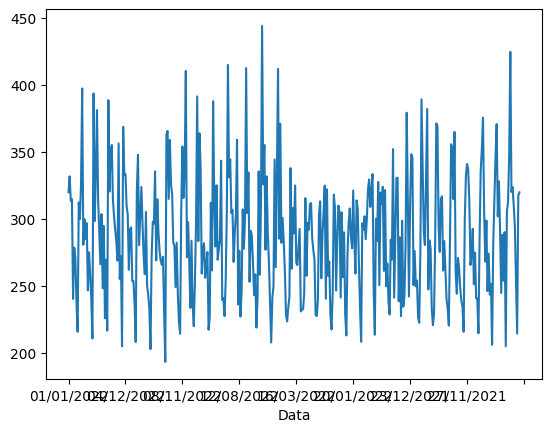

In [98]:
df_atualizado['CO'].plot()
plt.show()